
# Headline: Safeguarding Systems: Anomaly Detection in Cybersecurity

**Anomaly detection 🛡️🔍** in cybersecurity involves identifying deviations from normal behavior within network traffic, user activity, or system logs, enabling the early detection of potential security breaches or malicious activities.

**Benefits 🚨💻** include proactive threat identification, rapid response to emerging threats, and improved overall security posture, crucial for safeguarding sensitive data and critical infrastructure.


**AI-powered Anomaly Detection 🛡️🤖** in cybersecurity can automatically detect unusual patterns in network traffic, such as sudden spikes in data transfer or unusual login locations, helping to flag potential security threats before they cause harm.

- Learn more about Anomaly Detection with AI: https://www.strongdm.com/blog/anomaly-detection


### Headline: Shielding Networks: Isolation Forest for Anomaly Detection in Cybersecurity

**Isolation Forest 🌲🔒** is an **unsupervised machine learning algorithm** that identifies anomalies by isolating instances in a dataset. It's particularly effective in cybersecurity for **detecting outliers** in network traffic or user behavior, as it efficiently **isolates unusual patterns** that deviate from the norm, such as **suspicious network connections(network intrusion or fraud) or unauthorized access attempts**.

Isolation Forest, a machine learning algorithm, employs **efficient isolation techniques to pinpoint anomalies in cybersecurity data**, helping **identify suspicious network activity or unauthorized access attempts**. 🌲🔒


**Unsupervised machine learning algorithms 🧩🔍** learn from data without labeled responses, seeking patterns or structures autonomously.

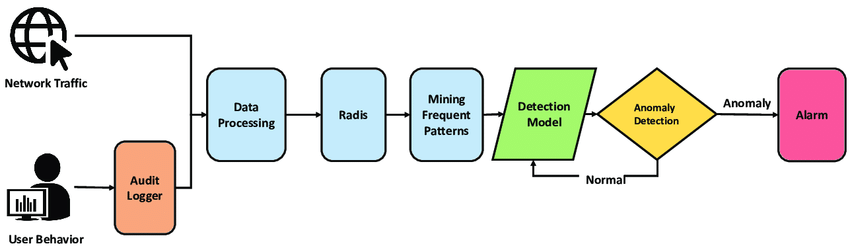

# Import Libraries

In [16]:
#mathmatical computation
import numpy as np

#dataframe
import pandas as pd

#data visualization
import matplotlib.pyplot as plt

#model build
from sklearn.ensemble import IsolationForest


# Data Preparation and Visualization

In [4]:
#generate random_seed for reproducibility
#algorithm multiple times with the same seed will produce the same outcomes

random_seed = np.random.RandomState(42)
print(f'memory location: {random_seed}')




memory location: RandomState(MT19937)




- X_train = 0.5 * random_seed.randn(500, 2): Generates a 2-dimensional array (500 rows and 2 columns) of random numbers sampled from a standard normal distribution (mean 0 and standard deviation 1) scaled by 0.5.
- X_train = np.r_[X_train + 3, X_train]: Adds another set of normal observations to the training data by creating a vertically stacked array. The + 3 shifts the original observations by 3 units in both dimensions before concatenating them with the original observations.
- This results in a training dataset (X_train) with 1000 observations (rows) and 2 features (columns), where the first 500 observations represent one set of normal observations, and the second 500 observations represent another set shifted by 3 units.

In [7]:
#generate set of normal observation for Training data
X_train = 0.5*random_seed.randn(500,2)
print(f'X_train: {X_train[0:10]}\n')
X_train = np.r_[X_train + 3, X_train]
print(f'\nX_train: {X_train}')
X_train = pd.DataFrame(X_train, columns = ["X", "y"])
X_train.head(5)

X_train: [[-3.37589137e-01 -7.22593354e-02]
 [-3.96209960e-01 -1.53980765e-01]
 [-9.46807333e-01  1.06646854e-01]
 [ 6.02737681e-04 -4.08544316e-01]
 [ 3.29622834e-01  4.68785069e-01]
 [-8.03779932e-01 -3.81362389e-01]
 [-3.84571175e-01 -4.69951551e-01]
 [ 4.14737421e-01 -9.69130694e-02]
 [-1.32257421e-01 -1.00193118e+00]
 [ 3.17709015e-01 -6.19629197e-01]]


X_train: [[ 2.66241086  2.92774066]
 [ 2.60379004  2.84601924]
 [ 2.05319267  3.10664685]
 ...
 [-0.47595923  0.03874026]
 [ 0.12887627 -0.62088029]
 [ 0.16708821 -0.07762952]]


,X,y
0,2.662411,2.927741
1,2.603790,2.846019
2,2.053193,3.106647
3,3.000603,2.591456
4,3.329623,3.468785


In [9]:
#generate set of normal observation for Training data
X_test = 0.5*random_seed.randn(500,2)
print(f'X_test: {X_test[0:10]}\n')
X_test = np.r_[X_test + 3, X_test]
print(f'\nX_test: {X_test}')
X_test = pd.DataFrame(X_test, columns = ["X", "y"])
X_test.head(5)

X_test: [[-0.4317468  -0.01560174]
 [ 0.00900844  0.23631517]
 [-0.68342918  0.29628364]
 [-1.35219582 -0.31494228]
 [-0.24413692  0.31666341]
 [ 0.01131543 -0.70278153]
 [-0.49249656  0.09934   ]
 [-0.03953367 -0.28956205]
 [-0.24041689  0.348084  ]
 [-0.25884629 -0.04404562]]


X_test: [[ 2.5682532   2.98439826]
 [ 3.00900844  3.23631517]
 [ 2.31657082  3.29628364]
 ...
 [-0.32868628 -0.02448252]
 [ 0.35570529  1.5564551 ]
 [ 0.40401809 -0.4240328 ]]


,X,y
0,2.568253,2.984398
1,3.009008,3.236315
2,2.316571,3.296284
3,1.647804,2.685058
4,2.755863,3.316663


In [11]:
#generate outliers with uniform distribution

X_outliers = random_seed.uniform(low = -5, high = 5, size = (50,2))
print(f'X_outliers: {X_outliers[0:10]}')

X_outliers = pd.DataFrame(X_outliers, columns = ["X", "y"])

X_outliers.head(5)

X_outliers: [[ 0.5270389  -3.85258042]
 [-3.73862342  0.29533615]
 [-2.31138455 -4.78963098]
 [ 2.22839204 -4.67513403]
 [ 0.95276841  0.39193794]
 [ 4.68814691 -0.15786861]
 [-4.36398564  0.51687968]
 [ 3.41096171  4.96849284]
 [-0.69656826 -1.79701258]
 [ 4.06653297 -3.08757871]]


,X,y
0,0.527039,-3.852580
1,-3.738623,0.295336
2,-2.311385,-4.789631
3,2.228392,-4.675134
4,0.952768,0.391938


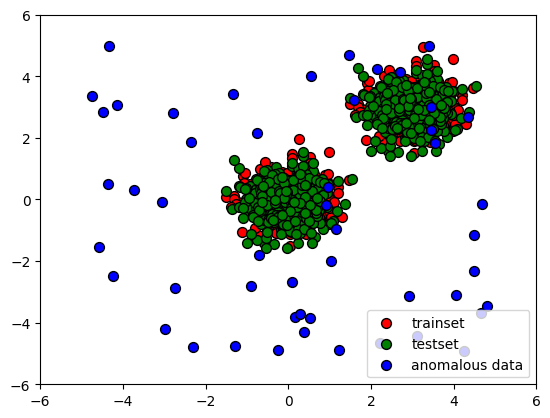

In [15]:
# Data Visualization

p1 = plt.scatter(X_train.X, X_train.y, c="red", s=50, edgecolor = "black")
p2 = plt.scatter(X_test.X, X_test.y, c="green", s=50, edgecolor = "black")
p3 = plt.scatter(X_outliers.X, X_outliers.y, c="blue", s=50, edgecolor = "black")


plt.xlim((-6, 6))
plt.ylim((-6, 6))

plt.legend(
    [p1, p2, p3],
    ['trainset', 'testset', 'anomalous data'],
    loc = 'lower right',

)

plt.show()

# Build Model

In [18]:
#build model
clf = IsolationForest()
clf.fit(X_train)

#predition
y_pred_train = clf.predict(X_train)
print(f'y_pred_train: {y_pred_train[0:10]}')


y_pred_test = clf.predict(X_test)
print(f'y_pred_test: {y_pred_test[0:10]}')


y_pred_outliers = clf.predict(X_outliers)
print(f'y_pred_outliers: {y_pred_outliers[0:10]}')


y_pred_train: [ 1  1 -1  1  1 -1  1  1 -1  1]
y_pred_test: [ 1  1  1 -1  1  1  1  1  1  1]
y_pred_outliers: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [24]:
#show algorithm performance on outliers
X_outliers =  X_outliers.assign(y_pred = y_pred_outliers)
X_outliers.head(10)

,X,y,y_pred
0,0.527039,-3.852580,-1
1,-3.738623,0.295336,-1
2,-2.311385,-4.789631,-1
3,2.228392,-4.675134,-1
4,0.952768,0.391938,-1
5,4.688147,-0.157869,-1
6,-4.363986,0.516880,-1
7,3.410962,4.968493,-1
8,-0.696568,-1.797013,-1
9,4.066533,-3.087579,-1


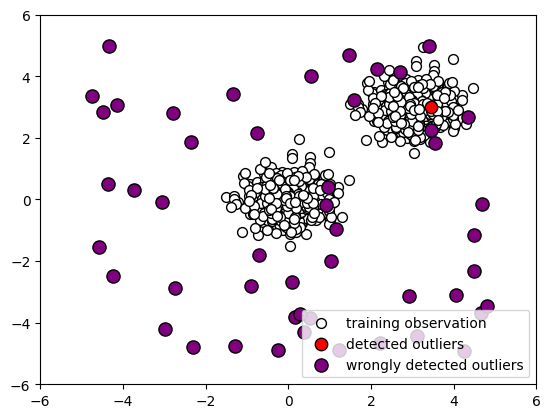

In [29]:
# Data Visualization after prediction of outliers

p1 = plt.scatter(X_train.X, X_train.y, c="white", s=50, edgecolor = "black")

p2 = plt.scatter(X_outliers.loc[X_outliers.y_pred == 1, ['X']],
                 X_outliers.loc[X_outliers.y_pred == 1, ['y']],
                 c="red",
                 s=80,
                 edgecolor = "black")


p3 = plt.scatter(X_outliers.loc[X_outliers.y_pred == -1, ['X']],
                 X_outliers.loc[X_outliers.y_pred == -1, ['y']],
                 c="purple",
                 s=90,
                 edgecolor = "black")


plt.xlim((-6, 6))
plt.ylim((-6, 6))

plt.legend(
    [p1, p2, p3],
    ['training observation', 'detected outliers', 'wrongly detected outliers'],
    loc = 'lower right',

)

plt.show()



In [26]:
#show algorithm performance on test set
X_test =  X_test.assign(y_pred = y_pred_test)
X_test.head(10)

,X,y,y_pred
0,2.568253,2.984398,1
1,3.009008,3.236315,1
2,2.316571,3.296284,1
3,1.647804,2.685058,-1
4,2.755863,3.316663,1
5,3.011315,2.297218,1
6,2.507503,3.099340,1
7,2.960466,2.710438,1
8,2.759583,3.348084,1
9,2.741154,2.955954,1


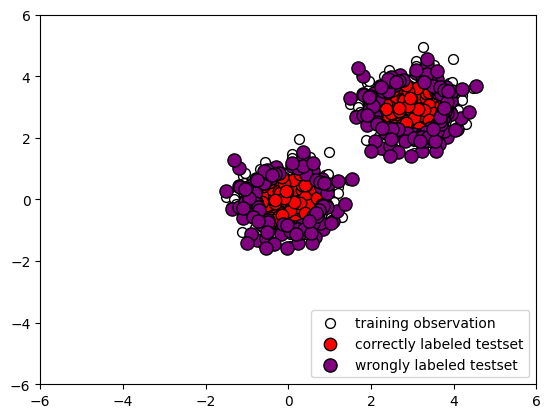

In [28]:
# Data Visualization after prediction of outliers

p1 = plt.scatter(X_train.X, X_train.y, c="white", s=50, edgecolor = "black")

p2 = plt.scatter(X_test.loc[X_test.y_pred == 1, ['X']],
                 X_test.loc[X_test.y_pred == 1, ['y']],
                 c="red",
                 s=80,
                 edgecolor = "black")


p3 = plt.scatter(X_test.loc[X_test.y_pred == -1, ['X']],
                 X_test.loc[X_test.y_pred == -1, ['y']],
                 c="purple",
                 s=90,
                 edgecolor = "black")


plt.xlim((-6, 6))
plt.ylim((-6, 6))

plt.legend(
    [p1, p2, p3],
    ['training observation', 'correctly labeled testset', 'wrongly labeled testset'],
    loc = 'lower right',

)

plt.show()

